# CE-40959: Deep Learning
## HW2 - MLP / Optimization Algorithms /  Batch Normalization / Dropout (Numpy)
(18 points)

### Deadline: 23 Esfand

#### Name:
#### Student No.:

# 1. Imports and Data Loading

In this Notebook, we're going to use the modules you implemented in Part1. We'll define a classification task and train a few models for it.

The dataset we're going to use is called Cifar100. It contains 60000 rgb images (50000 for train and 10000 for test or validation) each with shape (32, 32, 3). Every image has a corresponding label which is a number in range 0 to 99, indicating a class of object. You can see the classes in the picture below.

![title](images/cifar100.gif)

We'll also ask you to compare the results of different models.

** Keep in mind that the accuracy of Random Guess is 1 percent **

## 1.1 Imports
Run this cell to import the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from model import *
from adam import *
from batch_norm import *
from dense import *
from dropout import *
from module import *
from optimizer import *
from relu import *
from sgd import *
from sigmoid import *
from softmax_crossentropy import *

# we simply download cifar100 using tensorflow.keras library. this library is installed in google colab by default.
from tensorflow.keras.datasets import cifar100

## 1.2 Load the Data
We download the dataset using `cifar100.load_data()` and store the results into (`X_train`, `y_train`), (`X_val`, `y_val`)

In [2]:
(X_train, y_train), (X_val, y_val)= cifar100.load_data()
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


As we are using MLP for image classification, we need to flatten the images. Meaning reshaping the images to single dimension vectors.

In [3]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[3]) # flatten each image in X_train
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1] * X_val.shape[2] * X_val.shape[3])# flatten each image in X_val
X_train.shape, X_val.shape

((50000, 3072), (10000, 3072))

We also need the labels to be scalers. We use `np.squeeze()` method to do this.

In [4]:
y_train = np.squeeze(y_train) # squeeze y_train
y_val = np.squeeze(y_val) # squeeze y_val
y_train.shape, y_val.shape

((50000,), (10000,))

 ## 1.3. Normalization
 Run the cell below.

In [5]:
print(X_train.max(), X_train.min())
print(X_val.max(), X_val.min())

255 0
255 0


As you see, rgb values range from 0 to 255. We can devide every value by 255 to normalize the data.

In [6]:
X_train = X_train / X_train.max() # devide X_train by 255
X_val = X_val / X_val.max() # devide X_val by 255
print(X_train.max(), X_train.min())
print(X_val.max(), X_val.min())

1.0 0.0
1.0 0.0


## 1.4. Plot Function
This function get a history of training (loss, acc, val_loss, val_acc) as input and plots it.

In [0]:
def plot_history(history):
    losses, accs, val_losses, val_accs = history
    x = [i for i in range(len(losses))]
    
    # plot for losses
    plt.plot(x, losses, '-g', label='train')
    plt.plot(x, val_losses, '-r', label='validation')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='upper right')
    plt.show()
    
    # plot for accuracies
    plt.plot(x, accs, '-g', label='train')
    plt.plot(x, val_accs, '-r', label='validation')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='upper left')
    plt.show()

# 2. Problem: Learning Rate (5 points)
In this problem, We are going to see the effect of the `learning_rate` of `Adam` optimizer. We use the same model in the different sections of this problem. The only thing that is different, is the `learning_rate`.

We use `beta1 = 0.9`, `beta2 = 0.999` and `epsilon = 1e-8` for `Adam`.
The model contains a `Dense` layer with 100 neurones, followed by a `BatchNormalization` and a `ReLU` activation function. After that, we put another `Dense` layer with 100 neurones to output the probability of each class, followed by a `SoftmaxCrossentropy` module.

We train each model for 10 epochs and `batch_size = 1024`. We also plot the history of training.

**Note that you should assign a unique name for every module you define in your model.**

You can use `model.add(Module)` to add a module to the model. The modules are added in order.
It's also recommended to read the `model.py` file.

## 2.1. `learning_rate = 0.001`

Epoch 1
loss = 20.3915, acc = 0.0143, val_loss = 15.8880, val_acc = 0.0145
Epoch 2
loss = 14.2905, acc = 0.0181, val_loss = 12.7764, val_acc = 0.0224
Epoch 3
loss = 12.0593, acc = 0.0219, val_loss = 11.3158, val_acc = 0.0251
Epoch 4
loss = 10.7117, acc = 0.0253, val_loss = 10.1982, val_acc = 0.0246
Epoch 5
loss = 9.8758, acc = 0.0264, val_loss = 9.4103, val_acc = 0.0293
Epoch 6
loss = 9.2082, acc = 0.0295, val_loss = 8.9690, val_acc = 0.0297
Epoch 7
loss = 8.6775, acc = 0.0307, val_loss = 8.5174, val_acc = 0.0296
Epoch 8
loss = 8.2715, acc = 0.0318, val_loss = 8.0898, val_acc = 0.0312
Epoch 9
loss = 7.9154, acc = 0.0340, val_loss = 7.7727, val_acc = 0.0332
Epoch 10
loss = 7.6311, acc = 0.0350, val_loss = 7.5601, val_acc = 0.0340


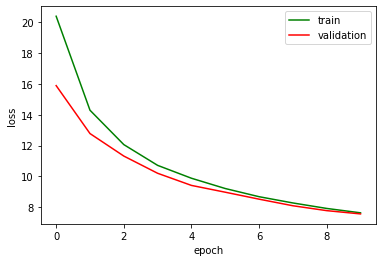

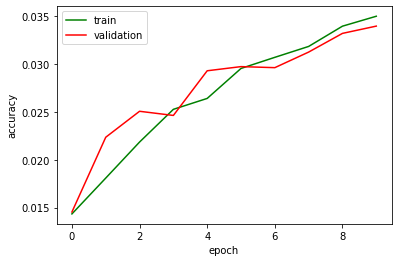

In [8]:
model = Model(Adam(learning_rate=1e-3, beta1=.9, beta2=.999))

# Layer info
(N, D1) = X_train.shape
D2 = 100
D3 = 100

# Layer 1 - dense (100 neurons) + batch normalization + relu
dense1 = Dense('layer1_dense', D1, D2)
batch1 = BatchNormalization('layer1_batchnorm', D2)
relu1 = ReLU('layer1_relu')

# Layer 2 - dense (100 neurons) + softmax cross entropy
dense2 = Dense('layer2_dense', D2, D3)
smce2 = SoftmaxCrossentropy('layer2_softmax')

model.add(dense1)
model.add(batch1)
model.add(relu1)
model.add(dense2)
model.add(smce2)

# add the layers to the model
history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=10)
plot_history(history)

## 2.2. `learning_rate = 0.01`

Epoch 1
loss = 7.8368, acc = 0.0380, val_loss = 4.9089, val_acc = 0.0505
Epoch 2
loss = 4.2667, acc = 0.0860, val_loss = 4.1936, val_acc = 0.0928
Epoch 3
loss = 4.0462, acc = 0.1050, val_loss = 4.0578, val_acc = 0.1038
Epoch 4
loss = 3.9454, acc = 0.1191, val_loss = 3.9953, val_acc = 0.1121
Epoch 5
loss = 3.8904, acc = 0.1284, val_loss = 3.9305, val_acc = 0.1178
Epoch 6
loss = 3.8204, acc = 0.1381, val_loss = 3.9038, val_acc = 0.1246
Epoch 7
loss = 3.7867, acc = 0.1422, val_loss = 3.8748, val_acc = 0.1306
Epoch 8
loss = 3.7367, acc = 0.1493, val_loss = 3.8580, val_acc = 0.1339
Epoch 9
loss = 3.7135, acc = 0.1534, val_loss = 3.8092, val_acc = 0.1421
Epoch 10
loss = 3.6680, acc = 0.1622, val_loss = 3.7937, val_acc = 0.1477


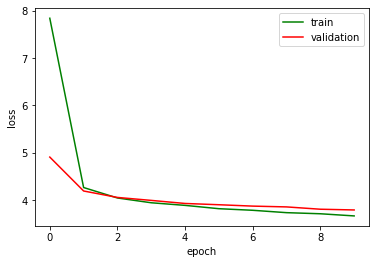

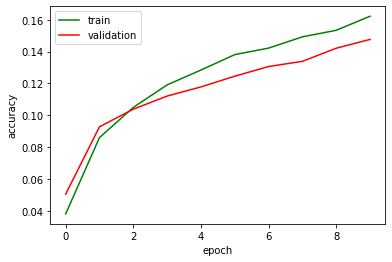

In [9]:
model = Model(Adam(learning_rate=1e-2, beta1=.9, beta2=.999))

# Layer info
(N, D1) = X_train.shape
D2 = 100
D3 = 100

# Layer 1 - dense (100 neurons) + batch normalization + relu
dense1 = Dense('layer1_dense', D1, D2)
batch1 = BatchNormalization('layer1_batchnorm', D2)
relu1 = ReLU('layer1_relu')

# Layer 2 - dense (100 neurons) + softmax cross entropy
dense2 = Dense('layer2_dense', D2, D3)
smce2 = SoftmaxCrossentropy('layer2_softmax')

model.add(dense1)
model.add(batch1)
model.add(relu1)
model.add(dense2)
model.add(smce2)

# add the layers to the model
history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=10)
plot_history(history)

## 2.3. `learning_rate = 0.1`

Epoch 1
loss = 11.0087, acc = 0.0434, val_loss = 5.4139, val_acc = 0.0719
Epoch 2
loss = 4.2305, acc = 0.1084, val_loss = 4.0075, val_acc = 0.1127
Epoch 3
loss = 3.8201, acc = 0.1329, val_loss = 3.8745, val_acc = 0.1308
Epoch 4
loss = 3.7142, acc = 0.1485, val_loss = 3.8176, val_acc = 0.1322
Epoch 5
loss = 3.6489, acc = 0.1563, val_loss = 3.7438, val_acc = 0.1456
Epoch 6
loss = 3.6013, acc = 0.1658, val_loss = 3.7042, val_acc = 0.1543
Epoch 7
loss = 3.5511, acc = 0.1760, val_loss = 3.6829, val_acc = 0.1543
Epoch 8
loss = 3.5225, acc = 0.1782, val_loss = 3.6662, val_acc = 0.1568
Epoch 9
loss = 3.4909, acc = 0.1828, val_loss = 3.6103, val_acc = 0.1637
Epoch 10
loss = 3.4550, acc = 0.1916, val_loss = 3.5903, val_acc = 0.1727


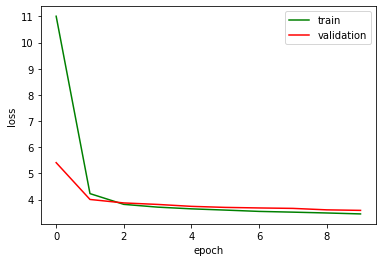

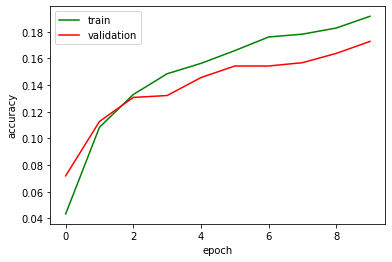

In [10]:
model = Model(Adam(learning_rate=1e-1, beta1=.9, beta2=.999))

# Layer info
(N, D1) = X_train.shape
D2 = 100
D3 = 100

# Layer 1 - dense (100 neurons) + batch normalization + relu
dense1 = Dense('layer1_dense', D1, D2)
batch1 = BatchNormalization('layer1_batchnorm', D2)
relu1 = ReLU('layer1_relu')

# Layer 2 - dense (100 neurons) + softmax cross entropy
dense2 = Dense('layer2_dense', D2, D3)
smce2 = SoftmaxCrossentropy('layer2_softmax')

model.add(dense1)
model.add(batch1)
model.add(relu1)
model.add(dense2)
model.add(smce2)

# add the layers to the model
history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=10)
plot_history(history)

## 2.4. `learning_rate = 1`

Epoch 1


/content/softmax_crossentropy.py:22: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(-np.log(probs[range(N), y])) / N
/content/softmax_crossentropy.py:21: RuntimeWarning: invalid value encountered in true_divide
  probs = temp / np.sum(temp, axis=1)[:, None]
/content/relu.py:15: RuntimeWarning: invalid value encountered in less
  out = np.where(x < 0, 0, x)
/content/relu.py:26: RuntimeWarning: invalid value encountered in less
  dx = dout * np.where(self.cache < 0, 0, 1)


loss = nan, acc = 0.0099, val_loss = nan, val_acc = 0.0103
Epoch 2
loss = nan, acc = 0.0101, val_loss = nan, val_acc = 0.0102
Epoch 3
loss = nan, acc = 0.0099, val_loss = nan, val_acc = 0.0098
Epoch 4
loss = nan, acc = 0.0093, val_loss = nan, val_acc = 0.0105
Epoch 5
loss = nan, acc = 0.0096, val_loss = nan, val_acc = 0.0091
Epoch 6
loss = nan, acc = 0.0097, val_loss = nan, val_acc = 0.0097
Epoch 7
loss = nan, acc = 0.0096, val_loss = nan, val_acc = 0.0104
Epoch 8
loss = nan, acc = 0.0100, val_loss = nan, val_acc = 0.0097
Epoch 9
loss = nan, acc = 0.0098, val_loss = nan, val_acc = 0.0095
Epoch 10
loss = nan, acc = 0.0098, val_loss = nan, val_acc = 0.0101


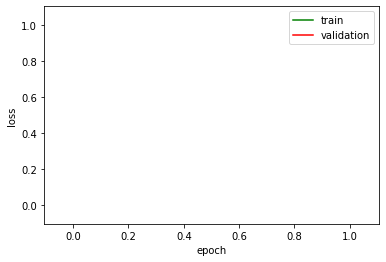

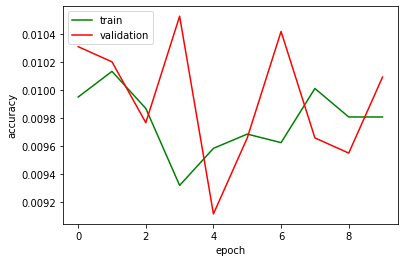

In [11]:
model = Model(Adam(learning_rate=1, beta1=.9, beta2=.999))

# Layer info
(N, D1) = X_train.shape
D2 = 100
D3 = 100

# Layer 1 - dense (100 neurons) + batch normalization + relu
dense1 = Dense('layer1_dense', D1, D2)
batch1 = BatchNormalization('layer1_batchnorm', D2)
relu1 = ReLU('layer1_relu')

# Layer 2 - dense (100 neurons) + softmax cross entropy
dense2 = Dense('layer2_dense', D2, D3)
smce2 = SoftmaxCrossentropy('layer2_softmax')

model.add(dense1)
model.add(batch1)
model.add(relu1)
model.add(dense2)
model.add(smce2)

# add the layers to the model
history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=10)
plot_history(history)

## 2.5. Compare the Results
** Compare the results of the models above. Which Learning Rate worked best? Why? (Feel free to write in Persian) **

write your answer here

# 3. Problem: Optimizers & Batch Normalization (5 points)
In this problem, We are going to try different optimizers with or without `BatchNormalization`. Except for optimizer and `BatchNormalization`, the other parts of the models in differenct sections are the same.

We use `learning_rate = 0.1`, `beta1 = 0.9`, `beta2 = 0.999`, `epsilon = 1e-8` for `Adam` and `learning_rate = 0.1`, `momentum = 0.9` for SGD.


The model contains a `Dense` layer with 100 neurones, followed by a `Sigmoid` activation function. After that, we put another `Dense` layer with 100 neurones to output the probability of each class, followed by a `SoftmaxCrossentropy` module.

In some models, we add a `BatchNormalization` after the first `Dense` module.

We train each model for 50 epochs and `batch_size = 1024`. We also plot the history of training.

## 3.1. SGD & No BatchNorm

Epoch 1
loss = 8.2223, acc = 0.0113, val_loss = 5.1527, val_acc = 0.0081
Epoch 2
loss = 4.8441, acc = 0.0105, val_loss = 4.6997, val_acc = 0.0127
Epoch 3
loss = 4.6821, acc = 0.0098, val_loss = 4.6712, val_acc = 0.0115
Epoch 4
loss = 4.6600, acc = 0.0101, val_loss = 4.6590, val_acc = 0.0101
Epoch 5
loss = 4.6529, acc = 0.0108, val_loss = 4.6577, val_acc = 0.0117
Epoch 6
loss = 4.6473, acc = 0.0103, val_loss = 4.6481, val_acc = 0.0104
Epoch 7
loss = 4.6438, acc = 0.0105, val_loss = 4.6484, val_acc = 0.0092
Epoch 8
loss = 4.6422, acc = 0.0095, val_loss = 4.6400, val_acc = 0.0119
Epoch 9
loss = 4.6386, acc = 0.0102, val_loss = 4.6380, val_acc = 0.0085
Epoch 10
loss = 4.6342, acc = 0.0097, val_loss = 4.6445, val_acc = 0.0104
Epoch 11
loss = 4.6337, acc = 0.0106, val_loss = 4.6339, val_acc = 0.0119
Epoch 12
loss = 4.6300, acc = 0.0104, val_loss = 4.6330, val_acc = 0.0123
Epoch 13
loss = 4.6301, acc = 0.0107, val_loss = 4.6349, val_acc = 0.0117
Epoch 14
loss = 4.6305, acc = 0.0115, val_loss 

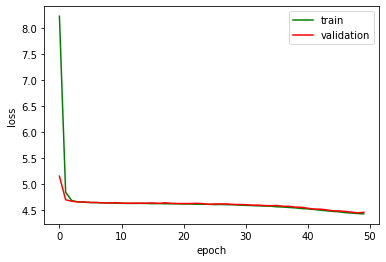

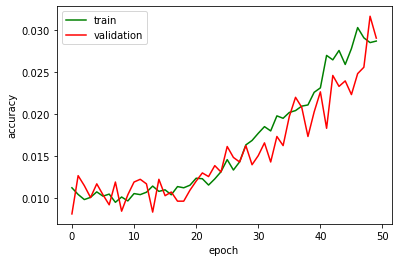

In [11]:
model = Model(SGD(learning_rate=1e-1, momentum=.9))
# add the layers to the model

# Layer info
(N, D1) = X_train.shape
D2 = 100
D3 = 100

# Layer 1 - dense (100 neurons) + sigmoid
dense1 = Dense('layer1_dense', D1, D2)
sigmoid1 = Sigmoid('layer1_sigmoid')

# Layer 2 - dense (100 neurons) + softmax cross entropy
dense2 = Dense('layer2_dense', D2, D3)
smce2 = SoftmaxCrossentropy('layer2_softmax')

model.add(dense1)
model.add(sigmoid1)
model.add(dense2)
model.add(smce2)


history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=50)
plot_history(history)

## 3.2. SGD & BatchNorm

Epoch 1
loss = 7.4295, acc = 0.0120, val_loss = 5.5619, val_acc = 0.0120
Epoch 2
loss = 5.2608, acc = 0.0169, val_loss = 5.1384, val_acc = 0.0177
Epoch 3
loss = 4.9565, acc = 0.0247, val_loss = 4.9083, val_acc = 0.0290
Epoch 4
loss = 4.7686, acc = 0.0331, val_loss = 4.7298, val_acc = 0.0350
Epoch 5
loss = 4.6342, acc = 0.0408, val_loss = 4.6182, val_acc = 0.0383
Epoch 6
loss = 4.5293, acc = 0.0450, val_loss = 4.5407, val_acc = 0.0397
Epoch 7
loss = 4.4588, acc = 0.0511, val_loss = 4.4912, val_acc = 0.0448
Epoch 8
loss = 4.4011, acc = 0.0547, val_loss = 4.4384, val_acc = 0.0508
Epoch 9
loss = 4.3493, acc = 0.0580, val_loss = 4.3683, val_acc = 0.0552
Epoch 10
loss = 4.3120, acc = 0.0618, val_loss = 4.3345, val_acc = 0.0596
Epoch 11
loss = 4.2691, acc = 0.0662, val_loss = 4.3096, val_acc = 0.0618
Epoch 12
loss = 4.2358, acc = 0.0689, val_loss = 4.2744, val_acc = 0.0618
Epoch 13
loss = 4.2150, acc = 0.0710, val_loss = 4.2517, val_acc = 0.0699
Epoch 14
loss = 4.1786, acc = 0.0753, val_loss 

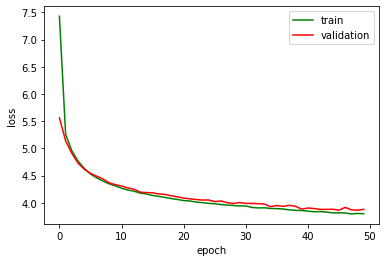

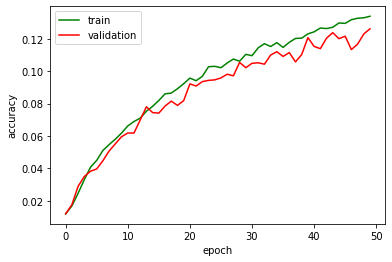

In [12]:
model = Model(SGD(learning_rate=1e-1, momentum=.9))
# add the layers to the model. don't forget to add a BatchNormalization module right after the first Dense module.

# Layer info
(N, D1) = X_train.shape
D2 = 100
D3 = 100

# Layer 1 - dense (100 neurons) + batch normalization + sigmoid
dense1 = Dense('layer1_dense', D1, D2)
batch1 = BatchNormalization('layer1_batchnorm', D2)
sigmoid1 = Sigmoid('layer1_sigmoid')

# Layer 2 - dense (100 neurons) + softmax cross entropy
dense2 = Dense('layer2_dense', D2, D3)
smce2 = SoftmaxCrossentropy('layer2_softmax')

model.add(dense1)
model.add(batch1)
model.add(sigmoid1)
model.add(dense2)
model.add(smce2)


history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=50)
plot_history(history)

## 3.3. Adam & BatchNorm

Epoch 1
loss = 12.3621, acc = 0.0302, val_loss = 5.5299, val_acc = 0.0434
Epoch 2
loss = 4.2254, acc = 0.0943, val_loss = 3.9888, val_acc = 0.1081
Epoch 3
loss = 3.8623, acc = 0.1203, val_loss = 3.8826, val_acc = 0.1203
Epoch 4
loss = 3.7778, acc = 0.1376, val_loss = 3.8062, val_acc = 0.1332
Epoch 5
loss = 3.7238, acc = 0.1443, val_loss = 3.8050, val_acc = 0.1332
Epoch 6
loss = 3.6680, acc = 0.1573, val_loss = 3.7116, val_acc = 0.1501
Epoch 7
loss = 3.6389, acc = 0.1640, val_loss = 3.7132, val_acc = 0.1531
Epoch 8
loss = 3.6051, acc = 0.1692, val_loss = 3.6766, val_acc = 0.1587
Epoch 9
loss = 3.5774, acc = 0.1733, val_loss = 3.6886, val_acc = 0.1543
Epoch 10
loss = 3.5537, acc = 0.1759, val_loss = 3.6665, val_acc = 0.1611
Epoch 11
loss = 3.5304, acc = 0.1807, val_loss = 3.6616, val_acc = 0.1636
Epoch 12
loss = 3.5296, acc = 0.1803, val_loss = 3.6260, val_acc = 0.1692
Epoch 13
loss = 3.5195, acc = 0.1872, val_loss = 3.6376, val_acc = 0.1650
Epoch 14
loss = 3.4785, acc = 0.1904, val_loss

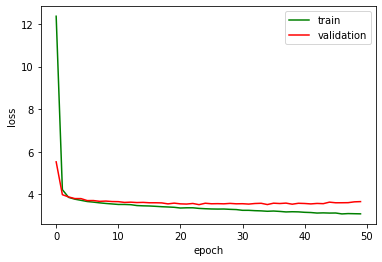

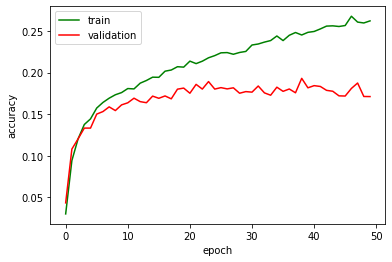

In [13]:
model = Model(Adam(learning_rate=1e-1, beta1=.9, beta2=.999))
# add the layers to the model. don't forget to add a BatchNormalization module right after the first Dense module.

# Layer info
(N, D1) = X_train.shape
D2 = 100
D3 = 100

# Layer 1 - dense (100 neurons) + batch normalization + sigmoid
dense1 = Dense('layer1_dense', D1, D2)
batch1 = BatchNormalization('layer1_batchnorm', D2)
sigmoid1 = Sigmoid('layer1_sigmoid')

# Layer 2 - dense (100 neurons) + softmax cross entropy
dense2 = Dense('layer2_dense', D2, D3)
smce2 = SoftmaxCrossentropy('layer2_softmax')

model.add(dense1)
model.add(batch1)
model.add(sigmoid1)
model.add(dense2)
model.add(smce2)


history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=50)
plot_history(history)

## 3.4. Compare the Results
** Compare the results of the models above. **

write your answer here

# 4. Problem: Regularization (8 points)
Take another look at the results of 3.3. You should be able to see a significant gap between `acc` and `val_acc`. In this problem, We try to reduce the overfitting and make the model generalize better.

## 4.1. L2 Regularization

`L2 Regularization` restricts the scale of the weights of a `Dense` module and Reduces the complexity of the model.

The `Dense` module you implemented, takes a `l2_coef` argument as input. In this problem, we try different values for `l2_coef`.

The optimizers and the models' structure is the same as in 3.3.

We train each model for 50 epochs and `batch_size = 1024`. We also plot the history of training.

### 4.1.1. `l2_coef = 1e-2`

Epoch 1
loss = 5.3166, acc = 0.0170, val_loss = 4.6940, val_acc = 0.0239
Epoch 2
loss = 4.5517, acc = 0.0279, val_loss = 4.5751, val_acc = 0.0265
Epoch 3
loss = 4.5035, acc = 0.0307, val_loss = 4.5363, val_acc = 0.0212
Epoch 4
loss = 4.4786, acc = 0.0344, val_loss = 4.5516, val_acc = 0.0265
Epoch 5
loss = 4.4721, acc = 0.0351, val_loss = 4.5348, val_acc = 0.0255
Epoch 6
loss = 4.4627, acc = 0.0362, val_loss = 4.5160, val_acc = 0.0167
Epoch 7
loss = 4.4670, acc = 0.0335, val_loss = 4.5189, val_acc = 0.0315
Epoch 8
loss = 4.4520, acc = 0.0394, val_loss = 4.5025, val_acc = 0.0384
Epoch 9
loss = 4.4501, acc = 0.0364, val_loss = 4.4938, val_acc = 0.0361
Epoch 10
loss = 4.4484, acc = 0.0359, val_loss = 4.4798, val_acc = 0.0234
Epoch 11
loss = 4.4466, acc = 0.0377, val_loss = 4.4891, val_acc = 0.0317
Epoch 12
loss = 4.4478, acc = 0.0381, val_loss = 4.4803, val_acc = 0.0397
Epoch 13
loss = 4.4459, acc = 0.0411, val_loss = 4.4939, val_acc = 0.0339
Epoch 14
loss = 4.4462, acc = 0.0405, val_loss 

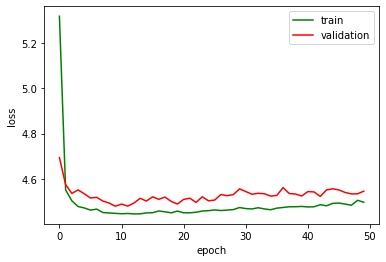

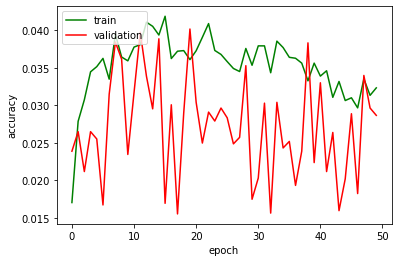

In [14]:
model = Model(Adam(learning_rate=1e-1, beta1=.9, beta2=.999))
# add the layers to the model. don't forget to set l2_coef for both Dense modules.
# Layer info
(N, D1) = X_train.shape
D2 = 100
D3 = 100

# Layer 1 - dense (100 neurons) + batch normalization + sigmoid
dense1 = Dense('layer1_dense', D1, D2, l2_coef=1e-2)
batch1 = BatchNormalization('layer1_batchnorm', D2)
sigmoid1 = Sigmoid('layer1_sigmoid')

# Layer 2 - dense (100 neurons) + softmax cross entropy
dense2 = Dense('layer2_dense', D2, D3, l2_coef=1e-2)
smce2 = SoftmaxCrossentropy('layer2_softmax')

model.add(dense1)
model.add(batch1)
model.add(sigmoid1)
model.add(dense2)
model.add(smce2)

history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=50)
plot_history(history)

### 4.1.2. `l2_coef = 1e-3`

Epoch 1
loss = 8.9405, acc = 0.0284, val_loss = 5.3256, val_acc = 0.0240
Epoch 2
loss = 4.2492, acc = 0.0778, val_loss = 4.3932, val_acc = 0.0359
Epoch 3
loss = 4.0271, acc = 0.0886, val_loss = 4.2773, val_acc = 0.0574
Epoch 4
loss = 3.9717, acc = 0.1007, val_loss = 4.1132, val_acc = 0.0714
Epoch 5
loss = 3.9490, acc = 0.1076, val_loss = 4.1636, val_acc = 0.0673
Epoch 6
loss = 3.9424, acc = 0.1070, val_loss = 4.2042, val_acc = 0.0561
Epoch 7
loss = 3.9360, acc = 0.1086, val_loss = 4.0926, val_acc = 0.0890
Epoch 8
loss = 3.9321, acc = 0.1073, val_loss = 4.1389, val_acc = 0.0791
Epoch 9
loss = 3.9066, acc = 0.1151, val_loss = 4.1644, val_acc = 0.0760
Epoch 10
loss = 3.8940, acc = 0.1181, val_loss = 4.1228, val_acc = 0.0779
Epoch 11
loss = 3.8962, acc = 0.1161, val_loss = 4.0836, val_acc = 0.0845
Epoch 12
loss = 3.9040, acc = 0.1144, val_loss = 4.1343, val_acc = 0.0757
Epoch 13
loss = 3.9031, acc = 0.1152, val_loss = 4.0934, val_acc = 0.0804
Epoch 14
loss = 3.8932, acc = 0.1201, val_loss 

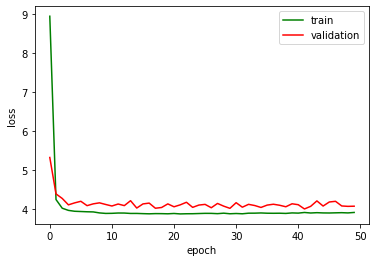

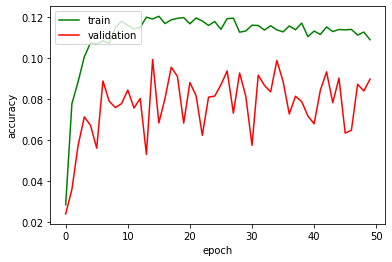

In [15]:
model = Model(Adam(learning_rate=1e-1, beta1=.9, beta2=.999))
# add the layers to the model. don't forget to set l2_coef for both Dense modules.
# Layer info
(N, D1) = X_train.shape
D2 = 100
D3 = 100

# Layer 1 - dense (100 neurons) + batch normalization + sigmoid
dense1 = Dense('layer1_dense', D1, D2, l2_coef=1e-3)
batch1 = BatchNormalization('layer1_batchnorm', D2)
sigmoid1 = Sigmoid('layer1_sigmoid')

# Layer 2 - dense (100 neurons) + softmax cross entropy
dense2 = Dense('layer2_dense', D2, D3, l2_coef=1e-3)
smce2 = SoftmaxCrossentropy('layer2_softmax')

model.add(dense1)
model.add(batch1)
model.add(sigmoid1)
model.add(dense2)
model.add(smce2)
history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=50)
plot_history(history)

### 4.1.3. `l2_coef = 1e-4`

Epoch 1
loss = 14.7368, acc = 0.0233, val_loss = 6.8281, val_acc = 0.0227
Epoch 2
loss = 4.4607, acc = 0.0879, val_loss = 4.4772, val_acc = 0.0675
Epoch 3
loss = 3.8758, acc = 0.1203, val_loss = 4.5652, val_acc = 0.0667
Epoch 4
loss = 3.8160, acc = 0.1279, val_loss = 4.4672, val_acc = 0.0600
Epoch 5
loss = 3.7502, acc = 0.1420, val_loss = 4.3149, val_acc = 0.0685
Epoch 6
loss = 3.7280, acc = 0.1444, val_loss = 4.2625, val_acc = 0.0763
Epoch 7
loss = 3.7025, acc = 0.1516, val_loss = 4.0323, val_acc = 0.0968
Epoch 8
loss = 3.6565, acc = 0.1589, val_loss = 4.1379, val_acc = 0.0838
Epoch 9
loss = 3.6699, acc = 0.1549, val_loss = 4.2079, val_acc = 0.0843
Epoch 10
loss = 3.6491, acc = 0.1569, val_loss = 4.0822, val_acc = 0.0968
Epoch 11
loss = 3.6336, acc = 0.1634, val_loss = 4.0589, val_acc = 0.0900
Epoch 12
loss = 3.6207, acc = 0.1659, val_loss = 3.9911, val_acc = 0.1039
Epoch 13
loss = 3.6000, acc = 0.1675, val_loss = 4.0686, val_acc = 0.0955
Epoch 14
loss = 3.5858, acc = 0.1716, val_loss

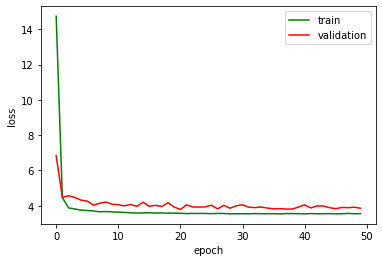

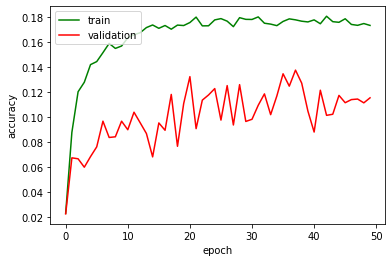

In [16]:
model = Model(Adam(learning_rate=1e-1, beta1=.9, beta2=.999))
# add the layers to the model. don't forget to set l2_coef for both Dense modules.
# Layer info
(N, D1) = X_train.shape
D2 = 100
D3 = 100

# Layer 1 - dense (100 neurons) + batch normalization + sigmoid
dense1 = Dense('layer1_dense', D1, D2, l2_coef=1e-4)
batch1 = BatchNormalization('layer1_batchnorm', D2)
sigmoid1 = Sigmoid('layer1_sigmoid')

# Layer 2 - dense (100 neurons) + softmax cross entropy
dense2 = Dense('layer2_dense', D2, D3, l2_coef=1e-4)
smce2 = SoftmaxCrossentropy('layer2_softmax')

model.add(dense1)
model.add(batch1)
model.add(sigmoid1)
model.add(dense2)
model.add(smce2)

history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=50)
plot_history(history)

### 4.1.4. `l2_coef = 1e-5`

Epoch 1
loss = 13.2463, acc = 0.0330, val_loss = 6.2034, val_acc = 0.0269
Epoch 2
loss = 4.2228, acc = 0.1083, val_loss = 4.3088, val_acc = 0.0831
Epoch 3
loss = 3.7328, acc = 0.1484, val_loss = 4.1068, val_acc = 0.1045
Epoch 4
loss = 3.6387, acc = 0.1640, val_loss = 4.0329, val_acc = 0.1035
Epoch 5
loss = 3.5957, acc = 0.1755, val_loss = 4.3153, val_acc = 0.0863
Epoch 6
loss = 3.5673, acc = 0.1817, val_loss = 4.0761, val_acc = 0.0983
Epoch 7
loss = 3.5345, acc = 0.1855, val_loss = 4.0863, val_acc = 0.1041
Epoch 8
loss = 3.5060, acc = 0.1904, val_loss = 3.9786, val_acc = 0.1069
Epoch 9
loss = 3.4939, acc = 0.1912, val_loss = 4.0615, val_acc = 0.1064
Epoch 10
loss = 3.4596, acc = 0.1974, val_loss = 4.0416, val_acc = 0.1199
Epoch 11
loss = 3.4335, acc = 0.2041, val_loss = 4.0341, val_acc = 0.1113
Epoch 12
loss = 3.4179, acc = 0.2048, val_loss = 3.9793, val_acc = 0.1251
Epoch 13
loss = 3.4087, acc = 0.2087, val_loss = 3.8988, val_acc = 0.1327
Epoch 14
loss = 3.4020, acc = 0.2100, val_loss

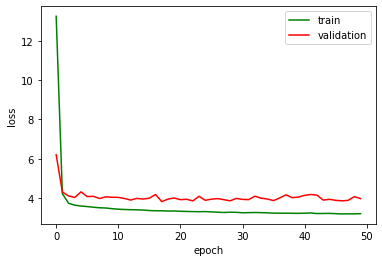

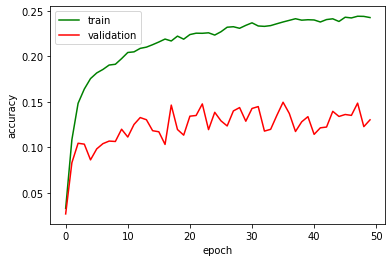

In [17]:
model = Model(Adam(learning_rate=1e-1, beta1=.9, beta2=.999))
# add the layers to the model. don't forget to set l2_coef for both Dense modules.
# Layer info
(N, D1) = X_train.shape
D2 = 100
D3 = 100

# Layer 1 - dense (100 neurons) + batch normalization + sigmoid
dense1 = Dense('layer1_dense', D1, D2, l2_coef=1e-5)
batch1 = BatchNormalization('layer1_batchnorm', D2)
sigmoid1 = Sigmoid('layer1_sigmoid')

# Layer 2 - dense (100 neurons) + softmax cross entropy
dense2 = Dense('layer2_dense', D2, D3, l2_coef=1e-5)
smce2 = SoftmaxCrossentropy('layer2_softmax')

model.add(dense1)
model.add(batch1)
model.add(sigmoid1)
model.add(dense2)
model.add(smce2)

history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=50)
plot_history(history)

### 4.1.5 Compare the Results
** Compare the results of the models above. **

write your answer here

## 4.2. Dropout
A more common regularization method is `Dropout`. In this problem, we try different values for `keep_prob` for `Dropout` module and compare the results.

The optimizers and the models' structure is the same as in 3.3. The only difference is we add a `Dropout` module right after `Sigmoid` activation.

We train each model for 50 epochs and `batch_size = 1024`. We also plot the history of training.

### 4.2.1. `keep_prob = 0.3`

Epoch 1
loss = 9.4926, acc = 0.0207, val_loss = 4.4006, val_acc = 0.0476
Epoch 2
loss = 4.7793, acc = 0.0301, val_loss = 4.2434, val_acc = 0.0591
Epoch 3
loss = 4.5909, acc = 0.0319, val_loss = 4.1811, val_acc = 0.0723
Epoch 4
loss = 4.5193, acc = 0.0353, val_loss = 4.1964, val_acc = 0.0783
Epoch 5
loss = 4.4885, acc = 0.0357, val_loss = 4.1547, val_acc = 0.0750
Epoch 6
loss = 4.4425, acc = 0.0379, val_loss = 4.1542, val_acc = 0.0717
Epoch 7
loss = 4.4388, acc = 0.0393, val_loss = 4.1332, val_acc = 0.0785
Epoch 8
loss = 4.4138, acc = 0.0397, val_loss = 4.1332, val_acc = 0.0715
Epoch 9
loss = 4.4001, acc = 0.0410, val_loss = 4.1333, val_acc = 0.0841
Epoch 10
loss = 4.3988, acc = 0.0409, val_loss = 4.1073, val_acc = 0.0744
Epoch 11
loss = 4.3883, acc = 0.0417, val_loss = 4.1210, val_acc = 0.0743
Epoch 12
loss = 4.3728, acc = 0.0426, val_loss = 4.0881, val_acc = 0.0757
Epoch 13
loss = 4.3726, acc = 0.0427, val_loss = 4.1147, val_acc = 0.0762
Epoch 14
loss = 4.3591, acc = 0.0447, val_loss 

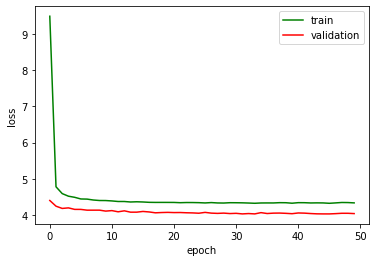

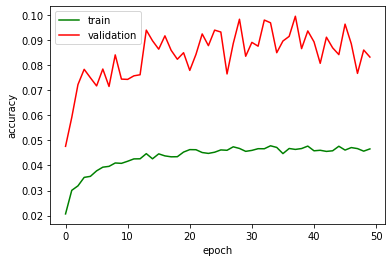

In [18]:
model = Model(Adam(learning_rate=1e-1, beta1=.9, beta2=.999))
# add the layers to the model.

# Layer info
(N, D1) = X_train.shape
D2 = 100
D3 = 100

# Layer 1 - dense (100 neurons) + batch normalization + sigmoid
dense1 = Dense('layer1_dense', D1, D2)
batch1 = BatchNormalization('layer1_batchnorm', D2)
sigmoid1 = Sigmoid('layer1_sigmoid')
dropout1 = Dropout('layer1_droput', keep_prob=0.3)

# Layer 2 - dense (100 neurons) + softmax cross entropy
dense2 = Dense('layer2_dense', D2, D3)
smce2 = SoftmaxCrossentropy('layer2_softmax')

model.add(dense1)
model.add(batch1)
model.add(sigmoid1)
model.add(dropout1)
model.add(dense2)
model.add(smce2)

history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=50)
plot_history(history)

### 4.2.2. `keep_prob = 0.5`

Epoch 1
loss = 8.7009, acc = 0.0289, val_loss = 4.3578, val_acc = 0.0558
Epoch 2
loss = 4.5405, acc = 0.0487, val_loss = 4.0800, val_acc = 0.0761
Epoch 3
loss = 4.3037, acc = 0.0579, val_loss = 3.9818, val_acc = 0.0896
Epoch 4
loss = 4.2339, acc = 0.0640, val_loss = 3.9365, val_acc = 0.1042
Epoch 5
loss = 4.2124, acc = 0.0660, val_loss = 3.9550, val_acc = 0.1080
Epoch 6
loss = 4.1733, acc = 0.0710, val_loss = 3.9149, val_acc = 0.1025
Epoch 7
loss = 4.1513, acc = 0.0727, val_loss = 3.8726, val_acc = 0.1159
Epoch 8
loss = 4.1304, acc = 0.0738, val_loss = 3.8912, val_acc = 0.1100
Epoch 9
loss = 4.1337, acc = 0.0708, val_loss = 3.8864, val_acc = 0.1200
Epoch 10
loss = 4.1295, acc = 0.0737, val_loss = 3.8835, val_acc = 0.1159
Epoch 11
loss = 4.1143, acc = 0.0763, val_loss = 3.8423, val_acc = 0.1313
Epoch 12
loss = 4.1065, acc = 0.0775, val_loss = 3.8662, val_acc = 0.1298
Epoch 13
loss = 4.0982, acc = 0.0773, val_loss = 3.8349, val_acc = 0.1143
Epoch 14
loss = 4.0904, acc = 0.0805, val_loss 

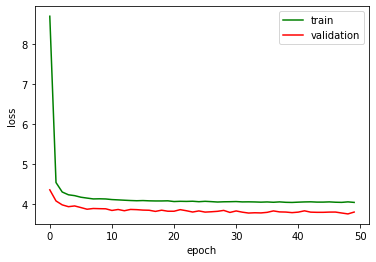

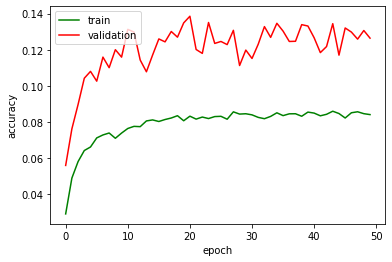

In [19]:
model = Model(Adam(learning_rate=1e-1, beta1=.9, beta2=.999))
# add the layers to the model.
# Layer info
(N, D1) = X_train.shape
D2 = 100
D3 = 100

# Layer 1 - dense (100 neurons) + batch normalization + sigmoid
dense1 = Dense('layer1_dense', D1, D2)
batch1 = BatchNormalization('layer1_batchnorm', D2)
sigmoid1 = Sigmoid('layer1_sigmoid')
dropout1 = Dropout('layer1_droput', keep_prob=0.5)

# Layer 2 - dense (100 neurons) + softmax cross entropy
dense2 = Dense('layer2_dense', D2, D3)
smce2 = SoftmaxCrossentropy('layer2_softmax')

model.add(dense1)
model.add(batch1)
model.add(sigmoid1)
model.add(dropout1)
model.add(dense2)
model.add(smce2)
history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=50)
plot_history(history)

### 4.2.3. `keep_prob = 0.7`

Epoch 1
loss = 9.6968, acc = 0.0268, val_loss = 4.5490, val_acc = 0.0544
Epoch 2
loss = 4.8560, acc = 0.0535, val_loss = 4.0133, val_acc = 0.0975
Epoch 3
loss = 4.3195, acc = 0.0688, val_loss = 3.8999, val_acc = 0.1114
Epoch 4
loss = 4.1588, acc = 0.0803, val_loss = 3.9032, val_acc = 0.1033
Epoch 5
loss = 4.0977, acc = 0.0866, val_loss = 3.8564, val_acc = 0.1139
Epoch 6
loss = 4.0536, acc = 0.0905, val_loss = 3.8340, val_acc = 0.1311
Epoch 7
loss = 4.0259, acc = 0.0942, val_loss = 3.8273, val_acc = 0.1214
Epoch 8
loss = 4.0035, acc = 0.0940, val_loss = 3.8159, val_acc = 0.1275
Epoch 9
loss = 4.0000, acc = 0.0953, val_loss = 3.7880, val_acc = 0.1357
Epoch 10
loss = 3.9883, acc = 0.0980, val_loss = 3.7824, val_acc = 0.1296
Epoch 11
loss = 3.9745, acc = 0.0993, val_loss = 3.7889, val_acc = 0.1280
Epoch 12
loss = 3.9728, acc = 0.1001, val_loss = 3.7889, val_acc = 0.1332
Epoch 13
loss = 3.9722, acc = 0.0999, val_loss = 3.7901, val_acc = 0.1389
Epoch 14
loss = 3.9441, acc = 0.1041, val_loss 

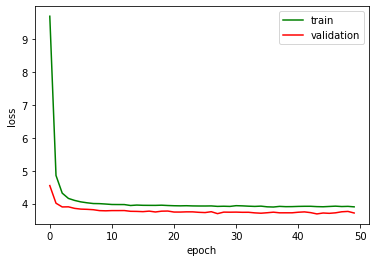

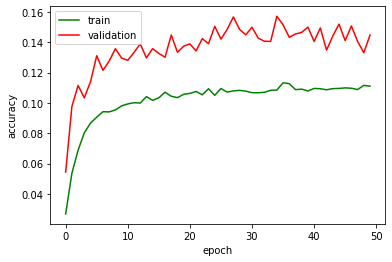

In [20]:
model = Model(Adam(learning_rate=1e-1, beta1=.9, beta2=.999))
# add the layers to the model.
# Layer info
(N, D1) = X_train.shape
D2 = 100
D3 = 100

# Layer 1 - dense (100 neurons) + batch normalization + sigmoid
dense1 = Dense('layer1_dense', D1, D2)
batch1 = BatchNormalization('layer1_batchnorm', D2)
sigmoid1 = Sigmoid('layer1_sigmoid')
dropout1 = Dropout('layer1_droput', keep_prob=0.7)

# Layer 2 - dense (100 neurons) + softmax cross entropy
dense2 = Dense('layer2_dense', D2, D3)
smce2 = SoftmaxCrossentropy('layer2_softmax')

model.add(dense1)
model.add(batch1)
model.add(sigmoid1)
model.add(dropout1)
model.add(dense2)
model.add(smce2)
history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=50)
plot_history(history)

### 4.2.4. Compare the Results
** Compare the results of the models above. **

write your answer here

## 4.3. Compare L2 Regularization and Dropout
** Which one of the L2 Regularization and Dropout worked better? **

write your answer here